In [2]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [3]:
# bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore
playstore = pd.read_csv("data/googleplaystore.csv") 

In [4]:
# Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)
playstore.drop_duplicates(subset='App',keep='first',inplace=True) 

In [5]:
# bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar
playstore.drop([10472], inplace=True) 

In [6]:
# Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai
playstore.Category = playstore.Category.astype('category')

In [7]:
# Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(",",""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace("+",""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace("Free","0"))

In [8]:
# bagian untuk mengubah tipe data Installs
playstore.Installs = playstore.Installs.astype('float64')

In [9]:
# Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float
playstore.Price = playstore.Price.apply(lambda x: x.replace("$",""))
playstore.Price = playstore.Price.astype('float64')

In [10]:
playstore.Size = playstore.Size.astype(str)

In [11]:
# Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer 
playstore.Reviews = playstore.Reviews.astype('int64')

playstore.Size = playstore.Size.apply(lambda x: x.replace("M",""))
playstore.Size = playstore.Size.apply(lambda x: x.replace('Varies with device',"0"))
playstore.Size = playstore.Size.apply(lambda x: x.replace("k",""))

playstore.Size = playstore.Size.astype('float64')
playstore.Installs = playstore.Installs.astype('int64')

In [12]:
df2 = playstore.copy()

In [13]:

# Statistik
# Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
# Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan 'Jumlah'
# sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. 
top_category = pd.crosstab(df2.Category,'Jumlah',values=df2.App,aggfunc='count').sort_values('Jumlah',ascending=False)
top_category

col_0,Jumlah
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [14]:
#Terakhir reset index dari dataframe top_category 
#top_category.reset_index(drop=True)
top_category.reset_index(inplace=True)
top_category

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [15]:
df2['Category']=df2['Category'].astype('object')
#Top10App=pd.DataFrame(df2.groupby('App',as_index=False).agg({'Category':'first','Reviews':'sum','Rating':'sum'}).sort_values('Reviews',ascending=False).head(10))
Top10=df2.groupby('App',as_index=False).agg({'Category':'first','Reviews':'sum','Rating':'sum'}).sort_values('Reviews',ascending=False)
Top10App=pd.DataFrame(Top10.head(10))
Top10App=Top10App[['Category','App','Reviews','Rating']]

In [16]:
Top10App.to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])
#.to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])

'<table border="1" class="dataframe table thead-light table-striped table-bordered table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Category</th>\n      <th>App</th>\n      <th>Reviews</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>4328</th>\n      <td>SOCIAL</td>\n      <td>Facebook</td>\n      <td>78158306</td>\n      <td>4.1</td>\n    </tr>\n    <tr>\n      <th>9041</th>\n      <td>COMMUNICATION</td>\n      <td>WhatsApp Messenger</td>\n      <td>69119316</td>\n      <td>4.4</td>\n    </tr>\n    <tr>\n      <th>5399</th>\n      <td>SOCIAL</td>\n      <td>Instagram</td>\n      <td>66577313</td>\n      <td>4.5</td>\n    </tr>\n    <tr>\n      <th>6165</th>\n      <td>COMMUNICATION</td>\n      <td>Messenger – Text and Video Chat for Free</td>\n      <td>56642847</td>\n      <td>4.0</td>\n    </tr>\n    <tr>\n      <th>2564</th>\n      <td>GAME</td>\n      <td>Clash of Clans</td>\n      <td>44891723</td

In [17]:
top_category['Category'].head()

0      FAMILY
1        GAME
2       TOOLS
3    BUSINESS
4     MEDICAL
Name: Category, dtype: category
Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., TOOLS, TRAVEL_AND_LOCAL, VIDEO_PLAYERS, WEATHER]

In [18]:
top_category['Category'].head().tolist()

['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL']

In [19]:
top_category['Jumlah'].sum()

9659

In [20]:
 # Dictionary stats digunakan untuk menyimpan beberapa data yang digunakan untuk menampilkan nilai di value box dan tabel
stats = {
# Ini adalah bagian untuk melengkapi konten value box 
# most category mengambil nama category paling banyak mengacu pada dataframe top_category
# total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe top_category
        'most_categories' : top_category['Category'].tolist() ,
        'total': top_category['Jumlah'].sum(),
        # rev_table adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna. 
        # Silahkan melakukan agregasi data yang tepat menggunakan groupby untuk menampilkan 10 aplikasi yang diurutkan berdasarkan 
        # jumlah Review pengguna. Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
        # Agregasi Anda dinilai benar jika hasilnya sama dengan tabel yang terlampir pada file ini
       'rev_table' : Top10App.to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])
    }
stats

{'most_categories': ['FAMILY',
  'GAME',
  'TOOLS',
  'BUSINESS',
  'MEDICAL',
  'PERSONALIZATION',
  'PRODUCTIVITY',
  'LIFESTYLE',
  'FINANCE',
  'SPORTS',
  'COMMUNICATION',
  'HEALTH_AND_FITNESS',
  'PHOTOGRAPHY',
  'NEWS_AND_MAGAZINES',
  'SOCIAL',
  'BOOKS_AND_REFERENCE',
  'TRAVEL_AND_LOCAL',
  'SHOPPING',
  'DATING',
  'VIDEO_PLAYERS',
  'MAPS_AND_NAVIGATION',
  'EDUCATION',
  'FOOD_AND_DRINK',
  'ENTERTAINMENT',
  'AUTO_AND_VEHICLES',
  'LIBRARIES_AND_DEMO',
  'WEATHER',
  'HOUSE_AND_HOME',
  'EVENTS',
  'ART_AND_DESIGN',
  'PARENTING',
  'COMICS',
  'BEAUTY'],
 'total': 9659,
 'rev_table': '<table border="1" class="dataframe table thead-light table-striped table-bordered table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Category</th>\n      <th>App</th>\n      <th>Reviews</th>\n      <th>Rating</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>4328</th>\n      <td>SOCIAL</td>\n      <td>Facebook</td>\n      <td>781583

In [21]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:
df2.groupby('Category',as_index=False).agg({'App':'count'}).rename({'Category':'Total'}, axis=1).sort_values('App',ascending=False).head()

,Total,App
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395


In [23]:
cat_order = df2.groupby('Category',as_index=False).agg({
   'App':'count'
        }).rename({'Category':'Total'}, axis=1).sort_values('App',ascending=False).head()
cat_order

,Total,App
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395


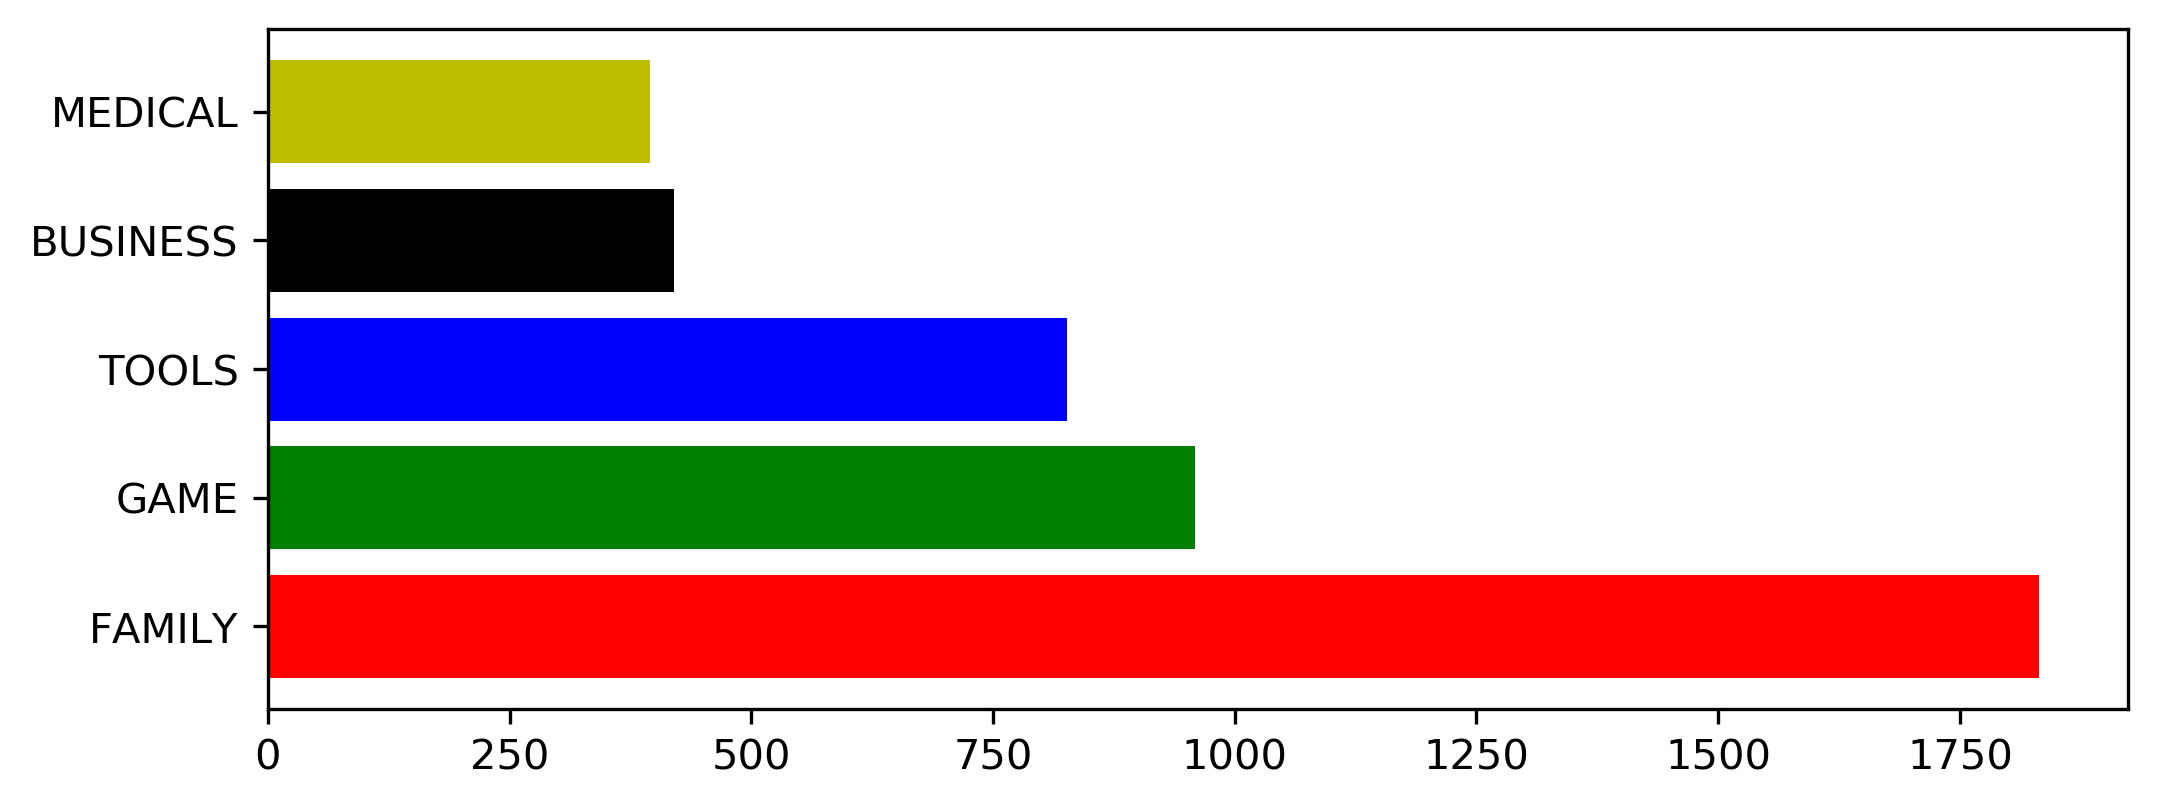

In [24]:
    ## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
    cat_order = df2.groupby('Category',as_index=False).agg({
   'App':'count'
        }).rename({'Category':'Total'}, axis=1).sort_values('App',ascending=False).head()
    X = cat_order['Total']
    Y = cat_order['App']
    my_colors = 'rgbkymc'
    # bagian ini digunakan untuk membuat kanvas/figure
    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()
    # bagian ini digunakan untuk membuat bar plot
    # isi variabel x dan y yang telah di definisikan di atas
    plt.barh(X,Y, color=my_colors)
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight") 

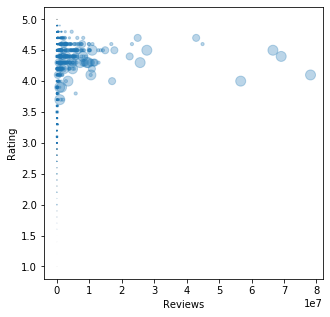

In [25]:
    ## Scatter Plot
    # Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
    # Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    X = df2['Reviews'].values # axis x
    Y = df2['Rating'].values # axis y
    area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    # isi nama method untuk scatter plot, variabel x, dan variabel y
    plt.scatter(x=X,y=Y, s=area, alpha=0.3)
    plt.xlabel('Reviews')
    plt.ylabel('Rating')
    plt.savefig('rev_rat.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result2 = str(figdata_png)[2:-1]

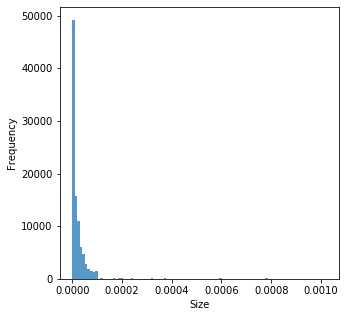

In [26]:
    ## Histogram Size Distribution
    # Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
    # Histogram yang terbentuk terbagi menjadi 100 bins
    X=(df2['Size']/1000000).values
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(x=X,bins=100, density=True,  alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.savefig('hist_size.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result3 = str(figdata_png)[2:-1]

In [33]:
#df2['Price'].value_counts()
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
data_line = df2.groupby('Category',as_index=False).agg({'Price':'sum'}).sort_values('Price',ascending=False).head()

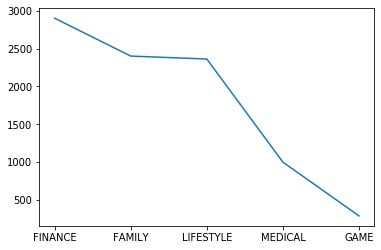

In [44]:
x=data_line['Category'].values
y=data_line['Price'].values
plt.plot(x,y)

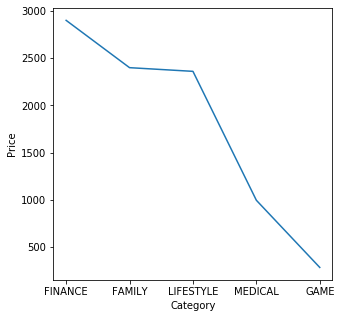

In [47]:
    ## Line Plot
    # Buatlah Line plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Category vs Price.
    # Ukuran Line menggambarkan berapa jumlah price di category
    data_line = df2.groupby('Category',as_index=False).agg({'Price':'sum'}).sort_values('Price',ascending=False).head()
    X = data_line['Category'].values # axis x
    Y = data_line['Price'].values # axis y
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    # isi nama method untuk scatter plot, variabel x, dan variabel y
    plt.plot(X,Y)
    plt.xlabel('Category')
    plt.ylabel('Price')
    plt.savefig('price_plot.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result2 = str(figdata_png)[2:-1]

NameError: name '____________________________' is not defined

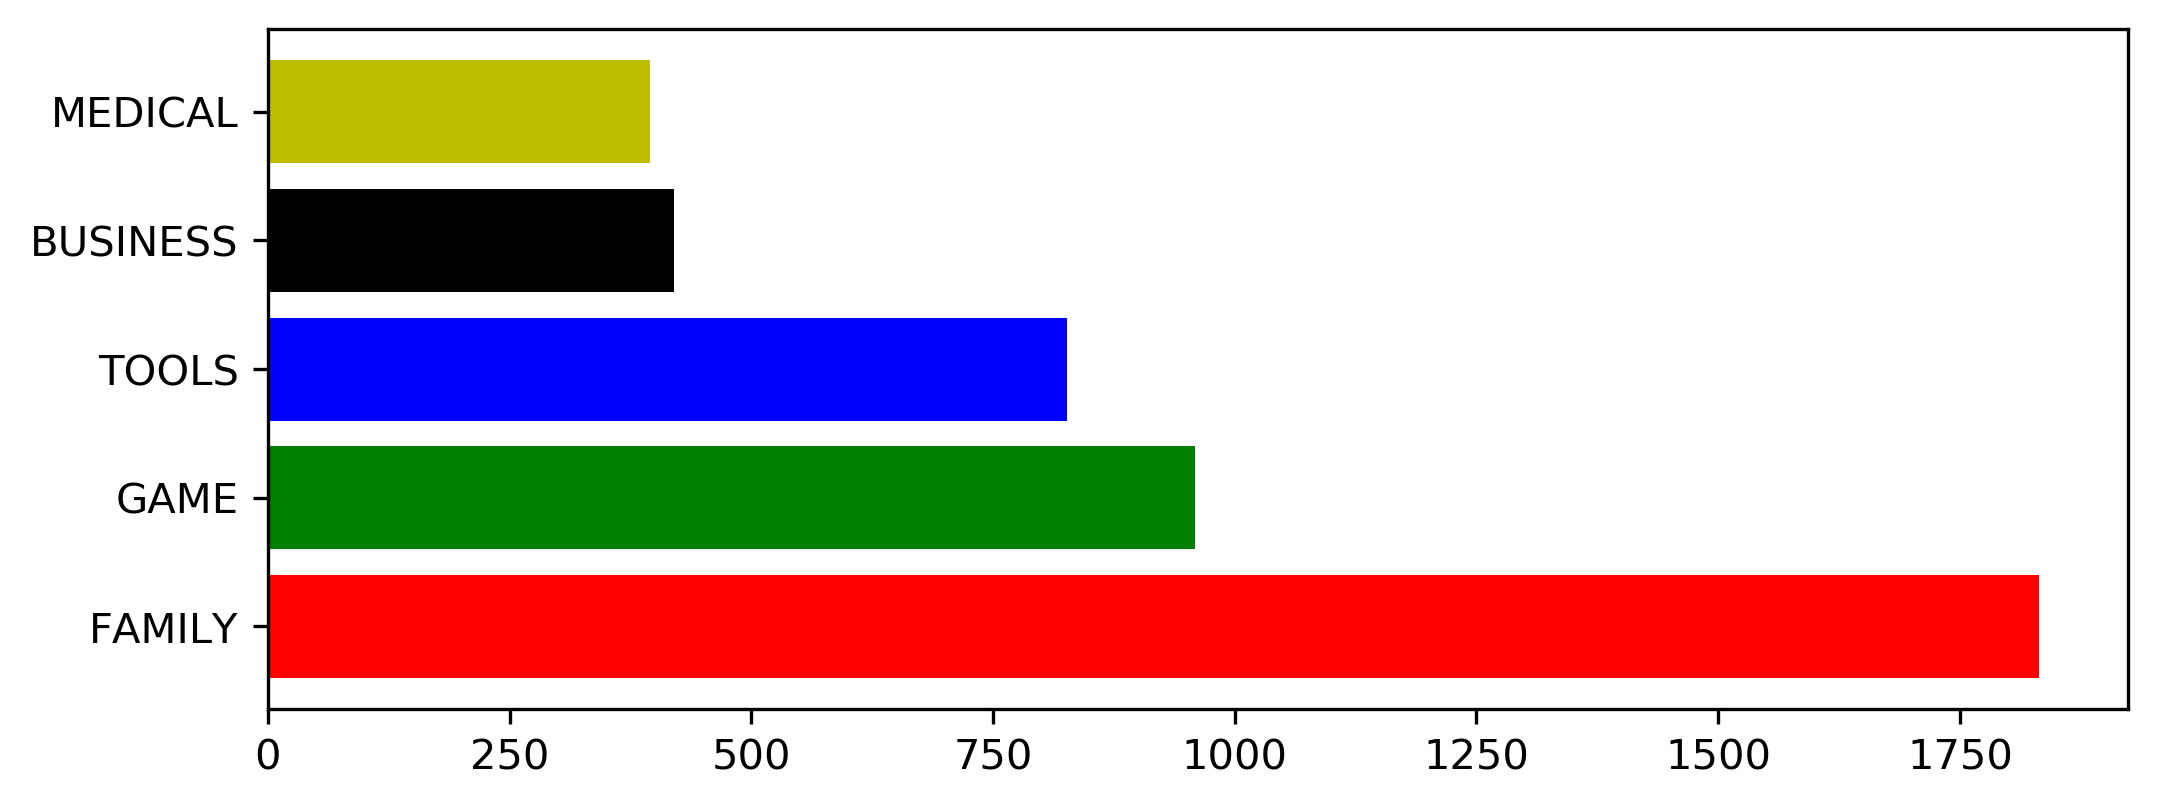

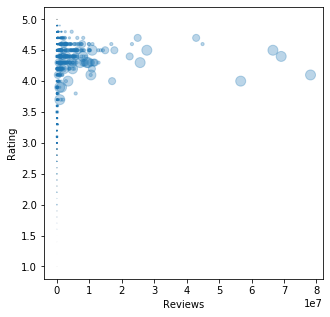

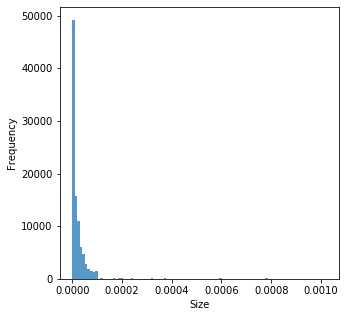

In [28]:

    ## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
    cat_order = df2.groupby('Category',as_index=False).agg({
   'App':'count'
        }).rename({'Category':'Total'}, axis=1).sort_values('App',ascending=False).head()
    X = cat_order['Total']
    Y = cat_order['App']
    my_colors = 'rgbkymc'
    # bagian ini digunakan untuk membuat kanvas/figure
    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()
    # bagian ini digunakan untuk membuat bar plot
    # isi variabel x dan y yang telah di definisikan di atas
    plt.barh(X,Y, color=my_colors)
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight") 


    # bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    # variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
    # halaman html
    result = str(figdata_png)[2:-1]
    
    ## Scatter Plot
    # Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
    # Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    X = df2['Reviews'].values # axis x
    Y = df2['Rating'].values # axis y
    area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    # isi nama method untuk scatter plot, variabel x, dan variabel y
    plt.scatter(x=X,y=Y, s=area, alpha=0.3)
    plt.xlabel('Reviews')
    plt.ylabel('Rating')
    plt.savefig('rev_rat.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result2 = str(figdata_png)[2:-1]

    ## Histogram Size Distribution
    # Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
    # Histogram yang terbentuk terbagi menjadi 100 bins
    X=(df2['Size']/1000000).values
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(x=X,bins=100, density=True,  alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.savefig('hist_size.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result3 = str(figdata_png)[2:-1]

    ## Buatlah sebuah plot yang menampilkan insight di dalam data 
    ____________________________
    ____________________________
    ____________________________


In [ ]:

    ## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
    cat_order = df2.groupby(_______).agg({
    _________ : _________
        }).rename({'Category':'Total'}, axis=1).sort_values(__________).head()
    X = _____________
    Y = _____________
    my_colors = 'rgbkymc'
    # bagian ini digunakan untuk membuat kanvas/figure
    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()
    # bagian ini digunakan untuk membuat bar plot
    # isi variabel x dan y yang telah di definisikan di atas
    plt.barh(____,_____, color=my_colors)
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight") 


    # bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    # variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
    # halaman html
    result = str(figdata_png)[2:-1]
    
    ## Scatter Plot
    # Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
    # Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    X = df2[______].values # axis x
    Y = df2[______].values # axis y
    area = playstore[_______].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    # isi nama method untuk scatter plot, variabel x, dan variabel y
    plt._______(x=_____,y=______, s=area, alpha=0.3)
    plt.xlabel('Reviews')
    plt.ylabel('Rating')
    plt.savefig('rev_rat.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result2 = str(figdata_png)[2:-1]

    ## Histogram Size Distribution
    # Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
    # Histogram yang terbentuk terbagi menjadi 100 bins
    X=(___________/1000000).values
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt._______(_____,bins=100, density=True,  alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.savefig('hist_size.png',bbox_inches="tight")

    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result3 = str(figdata_png)[2:-1]

    ## Buatlah sebuah plot yang menampilkan insight di dalam data 
    ____________________________
    ____________________________
    ____________________________
